In [1]:
!pip install tslearn==0.5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 12.6 MB/s eta 0:00:00


In [2]:
import tslearn
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

In [3]:
data = '/content/time_series_covid19_deaths_global.csv'
df = pd.read_csv(data, sep=',')
df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7844,7845,7845,7845,7845,7845,7845,7845,7846,7846
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,158,158,158,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4022


In [ ]:
dfl = df.drop(df.columns[4:700], axis=1)
dfl

,Province/State,Country/Region,Lat,Long,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.939110,67.709953,7333,7335,7335,7335,7341,7346,...,7844,7845,7845,7845,7845,7845,7845,7845,7846,7846
1,NaN,Albania,41.153300,20.168300,3161,3166,3172,3178,3180,3181,...,3594,3594,3594,3594,3594,3594,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,6180,6184,6190,6198,6205,6213,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,134,134,137,137,138,139,...,158,158,158,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,1738,1738,1738,1738,1741,1743,...,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,4855,4855,4870,4875,4882,4884,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,1976,1976,1977,1977,1981,1981,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,3678,3679,3684,3685,3685,3688,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4022


In [ ]:
dfl = dfl.drop(['Province/State', 'Country/Region'], axis='columns')
dfl

,Lat,Long,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,33.939110,67.709953,7333,7335,7335,7335,7341,7346,7348,7349,...,7844,7845,7845,7845,7845,7845,7845,7845,7846,7846
1,41.153300,20.168300,3161,3166,3172,3178,3180,3181,3187,3189,...,3594,3594,3594,3594,3594,3594,3595,3595,3595,3595
2,28.033900,1.659600,6180,6184,6190,6198,6205,6213,6222,6229,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,42.506300,1.521800,134,134,137,137,138,139,139,139,...,158,158,158,165,165,165,165,165,165,165
4,-11.202700,17.873900,1738,1738,1738,1738,1741,1743,1746,1746,...,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,31.952200,35.233200,4855,4855,4870,4875,4882,4884,4884,4884,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,39.904200,116.407400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,15.552727,48.516388,1976,1976,1977,1977,1981,1981,1982,1983,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,-13.133897,27.849332,3678,3679,3684,3685,3685,3688,3691,3697,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4022


In [ ]:
from tslearn.utils import to_time_series_dataset

In [ ]:
w = TimeSeriesKMeans(n_clusters=2)
ts = to_time_series_dataset(dfl)
w.fit(ts[:, :365])
w.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

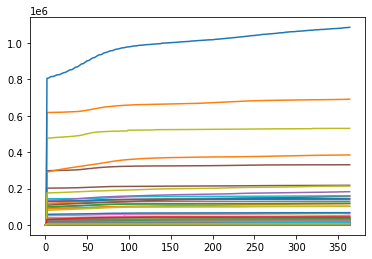

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(ts)):
  plt.plot(ts[i, :365])

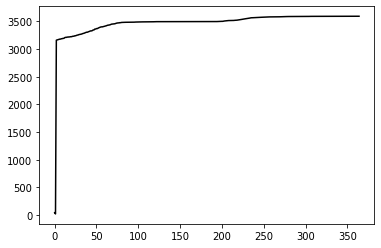

In [ ]:
color ='black'
for i in range(len(ts)):
  if i == (ts[221]).all():
    plt.plot(ts[i, :365], color=color)